## ----------------------- **Business Case: Credit Risk Model for Big Lion Bank** ---------------------

**Class:** Understanding Business

**Company:** ING HUBS 

**Authors:** Turgud Valiyev (466760), Shokoufeh Naseri (466750), Marco Ayuob (465767)

### -------------------------------------------------------------------------------------------------------------------------------------------

#### **Objective:** 
##### The task is to develop a credit risk model that assesses the probability of default for the bank’s clients. This will help the bank balance growth and risk management effectively.

#### **Data:**
##### It is an annual borrowing dataset provided in a CSV file named "credit_data.csv".
##### **Target variable:**  A binary variable indicating if a company will default within the next 12 months (1 = Default, 0 = No Default).
##### This dataset also includes:
1. Customer IDs.
2. Reporting date (end_date).
3. Financial data (balance sheet items and financial ratios in the local currency).
and so on...

### --------------------------------------------------------------------------------------------------------------------------------------

### -------------------------------------------------------- **1. VARIABLE INFO** ------------------------------------------------------

### Three files:
#### **1. Development Sample (development_sample.csv):**
##### Purpose: Contains loan application data for training the credit risk model.
#### **2. Testing Sample (testing_sample.csv):**
##### Purpose: Similar to the development sample but intended for testing the model after training.
#### **3. Variables Description (Variables_description.xlsx):**
##### Purpose: Provides descriptions for each variable in the development and testing datasets.

##### **Details of Vars:**
Column	- Description

id	- Application ID

customer_id	- Customer ID

application_date - Application date

target	- "Default indicator (1. loan went into default, 0. facility performing, Missing for rejected applications")

application_status - Application status (Approved/Rejected)

Var1 - Number of applicants

Var2 - Loan purpose

Var3 - Distribution channel

Var4 - Application amount

Var5 - Credit duration (months)

Var6 - Payment frequency

Var7 - Installment amount

Var8 - Value of the goods (car)

Var9 - Application data: income of main applicant

Var10 - Application data: income of second applicant

Var11 - Application data: profession of main applicant

Var12 - Application data: profession of second applicant

Var13 - Application data: employment date (main applicant)

Var14 - Application data: marital status of main applicant

Var15 - Application data: number of children of main applicant

Var16 - Application data: number of dependences of main applicant

Var17 - Spendings estimation

Var18 - Property ownership for property renovation

Var19 - Clasification of the vehicle (Car, Motorbike)

Var20 - Number of requests during the last 3 months (External data)

Var21 - Number of requests during the last 6 months (External data)

Var22 - Number of requests during the last 9 months (External data)

Var23 - Number of requests during the last 12 months (External data)

Var24 - Limit on credit card

Var25 - Amount on current account

Var26 - Amount on savings account

Var27 - Arrear in last 3 months (indicator)

Var28 - Arrear in last 12 months (indicator)

Var29 - Credit bureau score (Exterval data)

Var30 - Average income (Exterval data)

##### **More Details of Var variables:**

Var2	[1]	- Car Loan

Var2	[2]	- House Renovation

Var2	[3]	- Short Cash

Var3	[1] - Direct

Var3	[2]	- Broker

Var3	[3]	- Online

Var6	[1]	- monthly

Var6	[3]	- quarterly

Var6	[6]	- bi-yearly

Var11	[1]	- Pensioneer

Var11	[2]	- Government

Var11	[3]	- Military

Var11	[4]	- Self Employed

Var11	[5]	- Employee

Var11	[6]	- Business Owner

Var11	[7]	- Unemployed

Var12	[1]	- Pensioneer

Var12	[2]	- Government

Var12	[3]	- Military

Var12	[4]	- Self Employed

Var12	[5]	- Employee

Var12	[6]	- Business Owner

Var12	[7]	- Unemployed

Var14	[0]	- Single

Var14	[1]	- Married

Var14	[2]	- Informal relationship

Var14	[3]	- Divorced

Var14	[4]	- Widowed


### ---------------------------------------------------------------------------------------------------------------------------------------------

### --------------------------------------------------------- **2. DATA IMPORT**------------------------------------------------------------

In [2]:
import pandas as pd
import os

# ### FOR TURGUT 
# train_file_path = r'C:\Users\User\Desktop\Semester 4\Undersdanding Business\Final Project\Data\development_sample.csv'
# test_file_path = r'C:\Users\User\Desktop\Semester 4\Undersdanding Business\Final Project\Data\testing_sample.csv'

### FOR Shokufeh
###  .........


### FOR MARCO
train_file_path = '/Users/marcoayuob/Library/Mobile Documents/com~apple~CloudDocs/Data science /4th Semester/UB/development_sample.csv'
test_file_path = '/Users/marcoayuob/Library/Mobile Documents/com~apple~CloudDocs/Data science /4th Semester/UB/testing_sample.csv'

#----------------------------------------------------------------------------------------------------------------------------------------------------------------

# Check if the files exist
if os.path.exists(train_file_path) and os.path.exists(test_file_path):
    # Load the train and test datasets
    train_data = pd.read_csv(train_file_path)
    test_data = pd.read_csv(test_file_path)

    # Display the first few rows to verify the data is loaded correctly
    print("Train Data:")
    print(train_data.head())

    print("Test Data:")
    print(test_data.head())
else:
    print("One or both files do not exist. Please check the file paths.")

Train Data:
         ID  customer_id   application_date  target Application_status  Var1  \
0  11034977     32537148  01Feb2010 0:00:00     0.0           Approved     1   
1  11034978     32761663  01Feb2010 0:00:00     0.0           Approved     1   
2  11034979     32701063  01Feb2010 0:00:00     0.0           Approved     2   
3  11034980     32386786  01Feb2010 0:00:00     0.0           Approved     3   
4  11034981     32692110  02Feb2010 0:00:00     NaN           Rejected     1   

   Var2 Var3   Var4  Var5  ...  Var21  Var22  Var23  Var24    Var25     Var26  \
0   2.0    1   7800    99  ...      1      1      1      0  6768.42      0.00   
1   1.0    2  11100    78  ...      0      0      0  15000  5937.66   3870.60   
2   3.0    1   2400    15  ...      2      2      2      0  5647.77   1463.08   
3   1.0    2  11800    30  ...      0      0      0      0  3594.90  21563.78   
4   2.0    1  10200    72  ...      0      2      2      0  9908.45      0.00   

   Var27 Var28  Var2

In [3]:
# Check the number of rows and columns for the train and test datasets
print("Train Data Shape:")
print(f"Rows: {train_data.shape[0]}, Columns: {train_data.shape[1]}")

print("Test Data Shape:")
print(f"Rows: {test_data.shape[0]}, Columns: {test_data.shape[1]}")


Train Data Shape:
Rows: 50000, Columns: 35
Test Data Shape:
Rows: 5000, Columns: 35


### -----------------------------------------------------------------------------------------------------------------------------------------

### ------------------------------------------- **3. DATA CLEANING AND PREPARATION** ----------------------------------------------

#### ---------------------------------------------------------- **3.1. MISSING VALUES HANDLING** ----------------------------------------------------------

In [4]:
# Check the sum of missing values for each column in the train and test datasets
print("Missing Values in Train Data:")
print(train_data.isnull().sum())

print("\nMissing Values in Test Data:")
print(test_data.isnull().sum())


Missing Values in Train Data:
ID                        0
customer_id               0
application_date          0
target                13282
Application_status        0
Var1                      0
Var2                   1403
Var3                   1403
Var4                      0
Var5                      0
Var6                      0
Var7                      0
Var8                  29173
Var9                      0
Var10                 37538
Var11                     0
Var12                 37538
Var13                     0
Var14                     0
Var15                     0
Var16                     0
Var17                    40
Var18                 37416
Var19                 29173
Var20                     0
Var21                     0
Var22                     0
Var23                     0
Var24                     0
Var25                 10088
Var26                 19883
Var27                     0
Var28                     0
Var29                     0
Var30             

#### Variables contain more than 50% missing values

In [5]:
# Calculate the percentage of missing values for each column in both datasets
missing_train = train_data.isnull().mean() * 100
missing_test = test_data.isnull().mean() * 100

# List columns with more than 50% missing values
columns_train_50plus = missing_train[missing_train > 50].index.tolist()
columns_test_50plus = missing_test[missing_test > 50].index.tolist()

# Print the columns with more than 50% missing values
print("Columns in Train Data with >50% Missing Values:")
print(columns_train_50plus)

print("\nColumns in Test Data with >50% Missing Values:")
print(columns_test_50plus)

Columns in Train Data with >50% Missing Values:
['Var8', 'Var10', 'Var12', 'Var18', 'Var19']

Columns in Test Data with >50% Missing Values:
['Var8', 'Var10', 'Var12', 'Var18', 'Var19']


In [6]:

# Remove columns with more than 50% missing values in both train and test datasets
train_data_cleaned = train_data.drop(columns=columns_train_50plus)
test_data_cleaned = test_data.drop(columns=columns_test_50plus)

# Display the shapes of the cleaned datasets
print("\nTrain Data Shape After Removing Columns with >50% Missing Values:")
print(f"Rows: {train_data_cleaned.shape[0]}, Columns: {train_data_cleaned.shape[1]}")

print("\nTest Data Shape After Removing Columns with >50% Missing Values:")
print(f"Rows: {test_data_cleaned.shape[0]}, Columns: {test_data_cleaned.shape[1]}")


Train Data Shape After Removing Columns with >50% Missing Values:
Rows: 50000, Columns: 30

Test Data Shape After Removing Columns with >50% Missing Values:
Rows: 5000, Columns: 30


In [7]:
# Display the column names of the cleaned train and test datasets
print("Train Data Cleaned Columns:")
print(train_data_cleaned.columns)

print("\nTest Data Cleaned Columns:")
print(test_data_cleaned.columns)


Train Data Cleaned Columns:
Index(['ID', 'customer_id', 'application_date', 'target', 'Application_status',
       'Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var9', 'Var11',
       'Var13', 'Var14', 'Var15', 'Var16', 'Var17', 'Var20', 'Var21', 'Var22',
       'Var23', 'Var24', 'Var25', 'Var26', 'Var27', 'Var28', 'Var29', 'Var30'],
      dtype='object')

Test Data Cleaned Columns:
Index(['ID', 'customer_id', 'application_date', 'target', 'Application_status',
       'Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var9', 'Var11',
       'Var13', 'Var14', 'Var15', 'Var16', 'Var17', 'Var20', 'Var21', 'Var22',
       'Var23', 'Var24', 'Var25', 'Var26', 'Var27', 'Var28', 'Var29', 'Var30'],
      dtype='object')


In [8]:
# Updated list of categorical variables (remove columns that were dropped previously)
categorical_columns = [
    'Application_status',  # Corrected case for column name
    'target',  # Default indicator
    'Var1', 'Var2', 'Var3', 'Var6', 'Var11', 'Var14', 'Var27', 'Var28', 'Var29',  # Categorical variables remaining
]

# List of date columns
date_columns = ['application_date', 'Var13']

# Get all columns remaining after cleaning (except for categorical and date columns) for numerical data
all_columns = train_data_cleaned.columns.tolist()
numerical_columns = [col for col in all_columns if col not in categorical_columns and col not in date_columns]

# Only convert columns that are present in the dataset
# Convert categorical columns to 'category' type (only if they exist in the data)
categorical_columns_existing = [col for col in categorical_columns if col in train_data_cleaned.columns]
train_data_cleaned[categorical_columns_existing] = train_data_cleaned[categorical_columns_existing].astype('category')
test_data_cleaned[categorical_columns_existing] = test_data_cleaned[categorical_columns_existing].astype('category')

# Convert date columns to 'datetime' type (only if they exist in the data)
date_columns_existing = [col for col in date_columns if col in train_data_cleaned.columns]
train_data_cleaned[date_columns_existing] = train_data_cleaned[date_columns_existing].apply(pd.to_datetime, errors='coerce')
test_data_cleaned[date_columns_existing] = test_data_cleaned[date_columns_existing].apply(pd.to_datetime, errors='coerce')

# Convert numerical columns to 'float' type (only if they exist in the data)
numerical_columns_existing = [col for col in numerical_columns if col in train_data_cleaned.columns]
train_data_cleaned[numerical_columns_existing] = train_data_cleaned[numerical_columns_existing].astype('float')
test_data_cleaned[numerical_columns_existing] = test_data_cleaned[numerical_columns_existing].astype('float')

# Verify the changes in data types
print("Train Data Cleaned Data Types After Conversion:")
print(train_data_cleaned.dtypes)

print("\nTest Data Cleaned Data Types After Conversion:")
print(test_data_cleaned.dtypes)

Train Data Cleaned Data Types After Conversion:
ID                           float64
customer_id                  float64
application_date      datetime64[ns]
target                      category
Application_status          category
Var1                        category
Var2                        category
Var3                        category
Var4                         float64
Var5                         float64
Var6                        category
Var7                         float64
Var9                         float64
Var11                       category
Var13                 datetime64[ns]
Var14                       category
Var15                        float64
Var16                        float64
Var17                        float64
Var20                        float64
Var21                        float64
Var22                        float64
Var23                        float64
Var24                        float64
Var25                        float64
Var26                      

In [9]:
# Display the first few rows of the cleaned train and test datasets
print("Train Data Cleaned (First 5 Rows):")
train_data_cleaned.head()




Train Data Cleaned (First 5 Rows):


,ID,customer_id,application_date,target,Application_status,Var1,Var2,Var3,Var4,Var5,...,Var21,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29,Var30
0,11034977.0,32537148.0,2010-02-01,0.0,Approved,1,2.0,1,7800.0,99.0,...,1.0,1.0,1.0,0.0,6768.42,0.00,0,0,0,3899.0
1,11034978.0,32761663.0,2010-02-01,0.0,Approved,1,1.0,2,11100.0,78.0,...,0.0,0.0,0.0,15000.0,5937.66,3870.60,0,0,0,3899.0
2,11034979.0,32701063.0,2010-02-01,0.0,Approved,2,3.0,1,2400.0,15.0,...,2.0,2.0,2.0,0.0,5647.77,1463.08,0,0,10,3899.0
3,11034980.0,32386786.0,2010-02-01,0.0,Approved,3,1.0,2,11800.0,30.0,...,0.0,0.0,0.0,0.0,3594.90,21563.78,0,0,10,3899.0
4,11034981.0,32692110.0,2010-02-02,NaN,Rejected,1,2.0,1,10200.0,72.0,...,0.0,2.0,2.0,0.0,9908.45,0.00,0,0,20,3899.0


In [10]:
# Calculate the sum of missing values for each column in the cleaned train and test datasets
print("Missing Values in Train Data Cleaned:")
print(train_data_cleaned.isnull().sum())

print("\nMissing Values in Test Data Cleaned:")
print(test_data_cleaned.isnull().sum())


Missing Values in Train Data Cleaned:
ID                        0
customer_id               0
application_date          0
target                13282
Application_status        0
Var1                      0
Var2                   1403
Var3                   1403
Var4                      0
Var5                      0
Var6                      0
Var7                      0
Var9                      0
Var11                     0
Var13                   784
Var14                     0
Var15                     0
Var16                     0
Var17                    40
Var20                     0
Var21                     0
Var22                     0
Var23                     0
Var24                     0
Var25                 10088
Var26                 19883
Var27                     0
Var28                     0
Var29                     0
Var30                     0
dtype: int64

Missing Values in Test Data Cleaned:
ID                       0
customer_id              0
application_date 

### Approach for the Target Variable:
Given that missing values in the target variable represent rejected loans, it’s important to set these missing values as 0 (because the loan is not in default, meaning it is performing). This approach is in line with your business case where missing target values correspond to rejected applications.

### Approach for Other Variables:
**1. Categorical Variables:** For categorical variables with missing values (like Var2, Var3, Var6, etc.), we can substitute missing values with the mode (the most frequent value) of the respective column. This is a common practice for categorical features.

**2. Numerical Variables:** For numerical variables with missing values (like Var4, Var5, etc.), we can substitute missing values with the median. The median is a robust measure of central tendency, which helps mitigate the impact of outliers.

In [11]:
# Replace missing values in 'target' with 0 (rejected loans)
train_data_cleaned['target'].fillna(0, inplace=True)
test_data_cleaned['target'].fillna(0, inplace=True)

# Replace missing values in categorical columns with mode
categorical_columns_existing = [col for col in categorical_columns if col in train_data_cleaned.columns]
for col in categorical_columns_existing:
    mode_val = train_data_cleaned[col].mode()[0]  # Get the mode of the column
    
    # Ensure the mode value is a valid category in both train and test datasets
    if mode_val not in train_data_cleaned[col].cat.categories:
        train_data_cleaned[col] = train_data_cleaned[col].cat.add_categories([mode_val])
    if mode_val not in test_data_cleaned[col].cat.categories:
        test_data_cleaned[col] = test_data_cleaned[col].cat.add_categories([mode_val])
    
    # Fill missing values with the mode value in both train and test datasets
    train_data_cleaned[col].fillna(mode_val, inplace=True)
    test_data_cleaned[col].fillna(mode_val, inplace=True)

# Replace missing values in numerical columns with median
numerical_columns_existing = [col for col in numerical_columns if col in train_data_cleaned.columns]
for col in numerical_columns_existing:
    median_val = train_data_cleaned[col].median()  # Get the median of the column
    train_data_cleaned[col].fillna(median_val, inplace=True)
    test_data_cleaned[col].fillna(median_val, inplace=True)

# Verify the changes in missing values
print("Missing Values in Train Data Cleaned After Imputation:")
print(train_data_cleaned.isnull().sum())

print("\nMissing Values in Test Data Cleaned After Imputation:")
print(test_data_cleaned.isnull().sum())

Missing Values in Train Data Cleaned After Imputation:
ID                      0
customer_id             0
application_date        0
target                  0
Application_status      0
Var1                    0
Var2                    0
Var3                    0
Var4                    0
Var5                    0
Var6                    0
Var7                    0
Var9                    0
Var11                   0
Var13                 784
Var14                   0
Var15                   0
Var16                   0
Var17                   0
Var20                   0
Var21                   0
Var22                   0
Var23                   0
Var24                   0
Var25                   0
Var26                   0
Var27                   0
Var28                   0
Var29                   0
Var30                   0
dtype: int64

Missing Values in Test Data Cleaned After Imputation:
ID                     0
customer_id            0
application_date       0
target                

In [12]:
# Display the first few rows (head) of the cleaned train dataset
print("Train Data Cleaned (First 5 Rows):")
train_data_cleaned.head()


Train Data Cleaned (First 5 Rows):


,ID,customer_id,application_date,target,Application_status,Var1,Var2,Var3,Var4,Var5,...,Var21,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29,Var30
0,11034977.0,32537148.0,2010-02-01,0.0,Approved,1,2.0,1,7800.0,99.0,...,1.0,1.0,1.0,0.0,6768.42,0.00,0,0,0,3899.0
1,11034978.0,32761663.0,2010-02-01,0.0,Approved,1,1.0,2,11100.0,78.0,...,0.0,0.0,0.0,15000.0,5937.66,3870.60,0,0,0,3899.0
2,11034979.0,32701063.0,2010-02-01,0.0,Approved,2,3.0,1,2400.0,15.0,...,2.0,2.0,2.0,0.0,5647.77,1463.08,0,0,10,3899.0
3,11034980.0,32386786.0,2010-02-01,0.0,Approved,3,1.0,2,11800.0,30.0,...,0.0,0.0,0.0,0.0,3594.90,21563.78,0,0,10,3899.0
4,11034981.0,32692110.0,2010-02-02,0.0,Rejected,1,2.0,1,10200.0,72.0,...,0.0,2.0,2.0,0.0,9908.45,0.00,0,0,20,3899.0


In [13]:
# Display the first 5 rows of the cleaned train dataset including Var13
print("Train Data Cleaned (First 5 Rows with Var13):")
print(train_data_cleaned[['ID', 'customer_id', 'application_date', 'target', 'Application_status', 'Var13']].head())


Train Data Cleaned (First 5 Rows with Var13):
           ID  customer_id application_date target Application_status  \
0  11034977.0   32537148.0       2010-02-01    0.0           Approved   
1  11034978.0   32761663.0       2010-02-01    0.0           Approved   
2  11034979.0   32701063.0       2010-02-01    0.0           Approved   
3  11034980.0   32386786.0       2010-02-01    0.0           Approved   
4  11034981.0   32692110.0       2010-02-02    0.0           Rejected   

       Var13  
0 2004-11-26  
1 1996-09-16  
2 1989-05-06  
3 1987-12-06  
4 1989-05-18  


##### ALL MISSING VALUES ARE HANDLED. THE ONLY VAR 13 COLUMN STILL HAS MISSING VALUES HOWEVER, IT IS A DATE COLUMN AND NOT IMPORTANT TO FILL IT AND WE KEEP IT AS IT IS. And as a note, we used train mode, and medain for filling test data to avoid data leekage.

### ------------------------------------------------------------------------------------------------------------------------------------------

#### ---------------------------------------------------- **3.2. OUTLIER DETECTION AND HANDLING** ----------------------------------------------------

In [14]:
import numpy as np
import pandas as pd

# Calculate the IQR for each numerical column
numerical_columns_existing = [col for col in numerical_columns if col in train_data_cleaned.columns]
for col in numerical_columns_existing:
    Q1 = train_data_cleaned[col].quantile(0.25)
    Q3 = train_data_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Detect outliers in train and test datasets
    train_outliers = train_data_cleaned[(train_data_cleaned[col] < lower_bound) | (train_data_cleaned[col] > upper_bound)]
    test_outliers = test_data_cleaned[(test_data_cleaned[col] < lower_bound) | (test_data_cleaned[col] > upper_bound)]
    
    print(f"{col} - Outliers in Train Data: {train_outliers.shape[0]}")
    print(f"{col} - Outliers in Test Data: {test_outliers.shape[0]}")
    
    # Winsorize the outliers by capping values outside of the IQR range
    train_data_cleaned[col] = np.where(train_data_cleaned[col] < lower_bound, lower_bound, train_data_cleaned[col])
    train_data_cleaned[col] = np.where(train_data_cleaned[col] > upper_bound, upper_bound, train_data_cleaned[col])
    
    test_data_cleaned[col] = np.where(test_data_cleaned[col] < lower_bound, lower_bound, test_data_cleaned[col])
    test_data_cleaned[col] = np.where(test_data_cleaned[col] > upper_bound, upper_bound, test_data_cleaned[col])

# Verify that there are no more outliers
print("\nMissing Values in Train Data Cleaned After Winsorization:")
print(train_data_cleaned.isnull().sum())

print("\nMissing Values in Test Data Cleaned After Winsorization:")
print(test_data_cleaned.isnull().sum())


ID - Outliers in Train Data: 0
ID - Outliers in Test Data: 5000
customer_id - Outliers in Train Data: 0
customer_id - Outliers in Test Data: 0
Var4 - Outliers in Train Data: 293
Var4 - Outliers in Test Data: 36
Var5 - Outliers in Train Data: 4379
Var5 - Outliers in Test Data: 445
Var7 - Outliers in Train Data: 4013
Var7 - Outliers in Test Data: 409
Var9 - Outliers in Train Data: 780
Var9 - Outliers in Test Data: 83
Var15 - Outliers in Train Data: 3096
Var15 - Outliers in Test Data: 330
Var16 - Outliers in Train Data: 148
Var16 - Outliers in Test Data: 18
Var17 - Outliers in Train Data: 1890
Var17 - Outliers in Test Data: 189
Var20 - Outliers in Train Data: 2146
Var20 - Outliers in Test Data: 230
Var21 - Outliers in Train Data: 5524
Var21 - Outliers in Test Data: 574
Var22 - Outliers in Train Data: 1213
Var22 - Outliers in Test Data: 147
Var23 - Outliers in Train Data: 2037
Var23 - Outliers in Test Data: 244
Var24 - Outliers in Train Data: 7452
Var24 - Outliers in Test Data: 727
Var25 -

In [15]:
# Winsorization with different thresholds based on number of outliers
for col in numerical_columns_existing:
    # Calculate the IQR for each numerical feature
    Q1 = train_data_cleaned[col].quantile(0.25)
    Q3 = train_data_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Detect outliers
    train_outliers = train_data_cleaned[(train_data_cleaned[col] < lower_bound) | (train_data_cleaned[col] > upper_bound)]
    test_outliers = test_data_cleaned[(test_data_cleaned[col] < lower_bound) | (test_data_cleaned[col] > upper_bound)]
    
    num_train_outliers = train_outliers.shape[0]
    num_test_outliers = test_outliers.shape[0]
    
    print(f"{col} - Outliers in Train Data: {num_train_outliers}")
    print(f"{col} - Outliers in Test Data: {num_test_outliers}")
    
    # Decide on the winsorization thresholds based on the number of outliers
    if num_train_outliers > 1000:
        # Heavy Winsorization (10th/90th percentiles)
        lower_percentile, upper_percentile = 0.01, 0.99
    elif 100 <= num_train_outliers <= 1000:
        # Moderate Winsorization (5th/95th percentiles)
        lower_percentile, upper_percentile = 0.01, 0.99
    else:
        # Light Winsorization (1st/99th percentiles)
        lower_percentile, upper_percentile = 0.01, 0.99

    # Calculate the percentiles for the chosen Winsorization method
    lower_percentile_value = train_data_cleaned[col].quantile(lower_percentile)
    upper_percentile_value = train_data_cleaned[col].quantile(upper_percentile)
    
    # Apply Winsorization: cap the values at the calculated percentiles
    train_data_cleaned[col] = np.where(train_data_cleaned[col] < lower_percentile_value, lower_percentile_value, train_data_cleaned[col])
    train_data_cleaned[col] = np.where(train_data_cleaned[col] > upper_percentile_value, upper_percentile_value, train_data_cleaned[col])
    
    test_data_cleaned[col] = np.where(test_data_cleaned[col] < lower_percentile_value, lower_percentile_value, test_data_cleaned[col])
    test_data_cleaned[col] = np.where(test_data_cleaned[col] > upper_percentile_value, upper_percentile_value, test_data_cleaned[col])


ID - Outliers in Train Data: 0
ID - Outliers in Test Data: 0
customer_id - Outliers in Train Data: 0
customer_id - Outliers in Test Data: 0
Var4 - Outliers in Train Data: 0
Var4 - Outliers in Test Data: 0
Var5 - Outliers in Train Data: 0
Var5 - Outliers in Test Data: 0
Var7 - Outliers in Train Data: 0
Var7 - Outliers in Test Data: 0
Var9 - Outliers in Train Data: 0
Var9 - Outliers in Test Data: 0
Var15 - Outliers in Train Data: 0
Var15 - Outliers in Test Data: 0
Var16 - Outliers in Train Data: 0
Var16 - Outliers in Test Data: 0
Var17 - Outliers in Train Data: 0
Var17 - Outliers in Test Data: 0
Var20 - Outliers in Train Data: 0
Var20 - Outliers in Test Data: 0
Var21 - Outliers in Train Data: 0
Var21 - Outliers in Test Data: 0
Var22 - Outliers in Train Data: 0
Var22 - Outliers in Test Data: 0
Var23 - Outliers in Train Data: 0
Var23 - Outliers in Test Data: 0
Var24 - Outliers in Train Data: 0
Var24 - Outliers in Test Data: 0
Var25 - Outliers in Train Data: 0
Var25 - Outliers in Test Data:

In [16]:
# Re-check the number of outliers after Winsorization
for col in numerical_columns_existing:
    Q1 = train_data_cleaned[col].quantile(0.25)
    Q3 = train_data_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Detect outliers after Winsorization
    train_outliers_after = train_data_cleaned[(train_data_cleaned[col] < lower_bound) | (train_data_cleaned[col] > upper_bound)]
    test_outliers_after = test_data_cleaned[(test_data_cleaned[col] < lower_bound) | (test_data_cleaned[col] > upper_bound)]
    
    print(f"{col} - Outliers in Train Data After Winsorization: {train_outliers_after.shape[0]}")
    print(f"{col} - Outliers in Test Data After Winsorization: {test_outliers_after.shape[0]}")

ID - Outliers in Train Data After Winsorization: 0
ID - Outliers in Test Data After Winsorization: 0
customer_id - Outliers in Train Data After Winsorization: 0
customer_id - Outliers in Test Data After Winsorization: 0
Var4 - Outliers in Train Data After Winsorization: 0
Var4 - Outliers in Test Data After Winsorization: 0
Var5 - Outliers in Train Data After Winsorization: 0
Var5 - Outliers in Test Data After Winsorization: 0
Var7 - Outliers in Train Data After Winsorization: 0
Var7 - Outliers in Test Data After Winsorization: 0
Var9 - Outliers in Train Data After Winsorization: 0
Var9 - Outliers in Test Data After Winsorization: 0
Var15 - Outliers in Train Data After Winsorization: 0
Var15 - Outliers in Test Data After Winsorization: 0
Var16 - Outliers in Train Data After Winsorization: 0
Var16 - Outliers in Test Data After Winsorization: 0
Var17 - Outliers in Train Data After Winsorization: 0
Var17 - Outliers in Test Data After Winsorization: 0
Var20 - Outliers in Train Data After Wi

### -------------------------------------------------------------------------------------------------------------------------------------

#### ---------------------------------------------------------- **3.3. DATA BALANCE CHECK** ------------------------------------------------------------

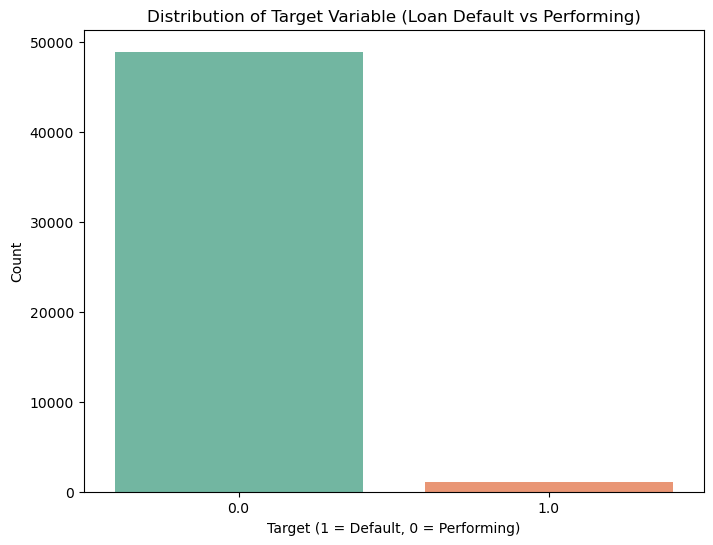

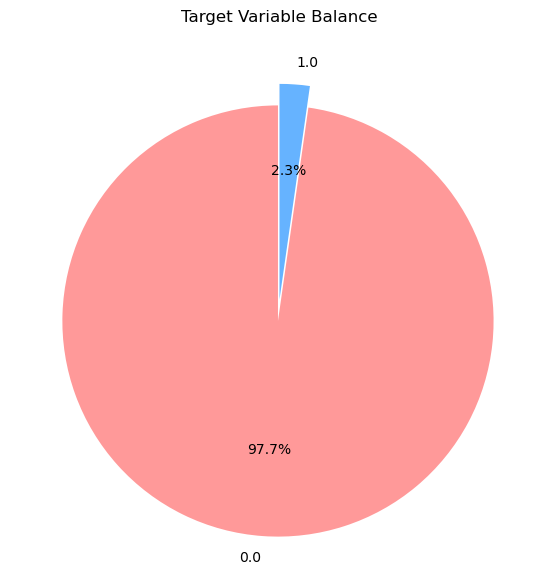

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=train_data_cleaned, palette='Set2')
plt.title('Distribution of Target Variable (Loan Default vs Performing)')
plt.xlabel('Target (1 = Default, 0 = Performing)')
plt.ylabel('Count')
plt.show()

# Alternatively, pie chart to visualize the balance
target_counts = train_data_cleaned['target'].value_counts()
plt.figure(figsize=(7, 7))
target_counts.plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90, explode=(0.1, 0))
plt.title('Target Variable Balance')
plt.ylabel('')
plt.show()


#### The plots show that target variable is highly imbalanced, with a dominant class (performing loans, represented by 0) and a very small number of defaulted loans (represented by 1). This kind of class imbalance can lead to poor model performance, especially for the minority class, as the model may focus more on predicting the majority class.

We will apply oversampling using SMOTE (Synthetic Minority Over-sampling Technique), which is one of the most commonly used methods for addressing class imbalance by generating synthetic samples for the minority class.

### ---------------------------------------------------------------------------------------------------------------------------------------

### ------------------------------------------- **4. EXPLORATRY DATA ANALYSIS (EDA)** ---------------------------------------------

####  **PLAN**

### 1. Data Overview
**Objective:** Getting a high-level understanding of the dataset.

**Actions:**

1.1 Check the shape of the dataset (train_data_cleaned.shape)

1.2 List all columns (train_data_cleaned.columns)

1.3 Get a summary of the data types (train_data_cleaned.dtypes)

1.4 Get basic statistics (train_data_cleaned.describe())


### 2. Univariate Analysis (Single Feature Analysis)

**Objective:** Understand the distribution and characteristics of individual variables.

**Actions:**

2.1 For Numerical Features:

Visualize distributions: Use histograms and boxplots to check the spread, skewness, and outliers of numerical features.

Summary Statistics: Mean, median, standard deviation, range, and percentiles.

2.2 For Categorical Features:

Frequency Distribution: Use bar charts to show the distribution of categories (e.g., count of different Application_status, Var1, etc.).

Check class imbalance: For binary features (like target), check the distribution of values (e.g., 0 and 1 in the target column).



### 3. Bivariate Analysis (Relationship Between Two Features)

**Objective:** Investigate relationships between features, especially between independent variables and the target variable.

**Actions:**

3.1 Numerical vs Categorical:

Boxplots/Violin plots: Visualize how numerical features differ across different categories of categorical variables.

3.2 Numerical vs Numerical:

Scatter plots: Visualize relationships between pairs of numerical features (e.g., Var4 vs Var5)

Correlation matrix: Calculate correlation coefficients to identify strong correlations between features

3.3 Categorical vs Categorical:

Stacked Bar plots: Visualize the interaction between two categorical features (e.g., Var2 vs Application_status)



### 4. Multivariate Analysis (Exploring Multiple Variables Together)

**Objective:** Investigate complex relationships between multiple features simultaneously.

**Actions:**

4.1 Pairplot: Visualize pairwise relationships between multiple numerical features.

4.2 Correlation Heatmap: Visualize the correlation matrix of numerical features to understand relationships between them (especially important for feature selection).

### 5. Target Variable Analysis

**Objective:** Understand how the target variable (target) behaves and interacts with other features.

**Actions:**

Visualize the target distribution: Use a bar plot or pie chart to check the balance of the target classes (e.g., default vs non-default).

### --------------------------------------------------------------------------------------------------------------------------------------

### FUTURE ENGINEERING

In [18]:
def create_features(df):
    df = df.copy()

    # Ensure all expected columns are present
    expected_vars = [f"Var{i}" for i in range(1, 31)]
    for var in expected_vars:
        if var not in df.columns:
            df[var] = np.nan

    # Temporal Features
    df['application_date'] = pd.to_datetime(df.get('application_date'), errors='coerce')
    df['application_month'] = df['application_date'].dt.month
    df['application_year'] = df['application_date'].dt.year
    df['application_weekday'] = df['application_date'].dt.weekday
    df['season_of_application'] = df['application_date'].dt.month % 12 // 3 + 1

    # Employment
    df['employment_duration_months'] = (
        pd.to_datetime('today') - pd.to_datetime(df['Var13'], errors='coerce')
    ).dt.days // 30

    # Income-related
    var9 = pd.to_numeric(df['Var9'], errors='coerce')
    var10 = pd.to_numeric(df['Var10'], errors='coerce')
    df['total_income'] = var9 + var10
    df['installment_to_income_ratio'] = pd.to_numeric(df['Var7'], errors='coerce') / (df['total_income'] + 1)
    df['application_amount_to_income'] = pd.to_numeric(df['Var4'], errors='coerce') / (df['total_income'] + 1)
    df['goods_value_to_income_ratio'] = pd.to_numeric(df['Var8'], errors='coerce') / (df['total_income'] + 1)
    df['income_difference'] = abs(var9 - var10)
    df['has_second_applicant'] = var10 > 0

    # Requests and Arrears
    df['total_requests_last_year'] = df[['Var20', 'Var21', 'Var22', 'Var23']].apply(pd.to_numeric, errors='coerce').sum(axis=1)
    df['request_trend_3_to_12_months'] = pd.to_numeric(df['Var20'], errors='coerce') - pd.to_numeric(df['Var23'], errors='coerce')
    df['has_recent_arrears'] = pd.to_numeric(df['Var27'], errors='coerce') > 0
    df['has_arrears_last_year'] = pd.to_numeric(df['Var28'], errors='coerce') > 0
    df['arrears_flag'] = df['has_recent_arrears'] | df['has_arrears_last_year']

    # Credit score bucket
    df['credit_score_bucket'] = pd.cut(
        pd.to_numeric(df['Var29'], errors='coerce'),
        bins=[0, 500, 600, 700, 800, 900, 1000],
        labels=['<500', '500-599', '600-699', '700-799', '800-899', '900+']
    )

    # Household and Demographics
    var15 = pd.to_numeric(df['Var15'], errors='coerce')
    var16 = pd.to_numeric(df['Var16'], errors='coerce')
    df['family_size'] = 1 + var15 + var16
    df['dependents_ratio'] = (var15 + var16) / df['family_size']
    df['is_single'] = df['Var14'] == 0
    df['is_married'] = df['Var14'] == 1
    df['has_children'] = var15 > 0
    df['has_dependents'] = var16 > 0

    # Financial liquidity
    df['total_bank_assets'] = pd.to_numeric(df['Var25'], errors='coerce') + pd.to_numeric(df['Var26'], errors='coerce')
    df['liquidity_ratio'] = df['total_bank_assets'] / (df['total_income'] + 1)
    df['spending_to_income_ratio'] = pd.to_numeric(df['Var17'], errors='coerce') / (df['total_income'] + 1)
    df['has_credit_card_limit'] = pd.to_numeric(df['Var24'], errors='coerce') > 0
    df['credit_limit_utilization'] = pd.to_numeric(df['Var4'], errors='coerce') / (pd.to_numeric(df['Var24'], errors='coerce') + 1)

    # Categorical interactions
    df['loan_purpose_car'] = df['Var2'] == 1
    df['is_broker'] = df['Var3'] == 2
    df['is_quarterly_payment'] = df['Var6'] == 3
    df['is_self_employed'] = (df['Var11'] == 4) | (df['Var12'] == 4)
    df['is_unemployed'] = (df['Var11'] == 7) | (df['Var12'] == 7)
    df['has_business_income'] = (df['Var11'] == 6) | (df['Var12'] == 6)
    df['vehicle_type_encoded'] = df['Var19'].map({'Car': 0, 'Motorbike': 1})

    return df

In [19]:
train_data_cleaned = create_features(train_data_cleaned)
test_data_cleaned = create_features(test_data_cleaned)

In [20]:
# print columns names
print("Train Data Columns:")
print(train_data_cleaned.columns.tolist())
print("\nTest Data Columns:")
print(test_data_cleaned.columns.tolist())

Train Data Columns:
['ID', 'customer_id', 'application_date', 'target', 'Application_status', 'Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var9', 'Var11', 'Var13', 'Var14', 'Var15', 'Var16', 'Var17', 'Var20', 'Var21', 'Var22', 'Var23', 'Var24', 'Var25', 'Var26', 'Var27', 'Var28', 'Var29', 'Var30', 'Var8', 'Var10', 'Var12', 'Var18', 'Var19', 'application_month', 'application_year', 'application_weekday', 'season_of_application', 'employment_duration_months', 'total_income', 'installment_to_income_ratio', 'application_amount_to_income', 'goods_value_to_income_ratio', 'income_difference', 'has_second_applicant', 'total_requests_last_year', 'request_trend_3_to_12_months', 'has_recent_arrears', 'has_arrears_last_year', 'arrears_flag', 'credit_score_bucket', 'family_size', 'dependents_ratio', 'is_single', 'is_married', 'has_children', 'has_dependents', 'total_bank_assets', 'liquidity_ratio', 'spending_to_income_ratio', 'has_credit_card_limit', 'credit_limit_utilization', 'loan_pu

In [21]:
# print data types
print("Train Data Data Types:")
print(train_data_cleaned.dtypes)
print("\nTest Data Data Types:")
print(test_data_cleaned.dtypes)

Train Data Data Types:
ID                             float64
customer_id                    float64
application_date        datetime64[ns]
target                        category
Application_status            category
                             ...      
is_quarterly_payment              bool
is_self_employed                  bool
is_unemployed                     bool
has_business_income               bool
vehicle_type_encoded           float64
Length: 70, dtype: object

Test Data Data Types:
ID                             float64
customer_id                    float64
application_date        datetime64[ns]
target                        category
Application_status            category
                             ...      
is_quarterly_payment              bool
is_self_employed                  bool
is_unemployed                     bool
has_business_income               bool
vehicle_type_encoded           float64
Length: 70, dtype: object


In [22]:
from sklearn.preprocessing import StandardScaler

# Define columns to exclude from scaling
exclude_cols = ['target']

# Identify numeric columns to scale (excluding 'target')
numeric_cols = train_data_cleaned.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test
train_data_scaled = train_data_cleaned.copy()
test_data_scaled = test_data_cleaned.copy()

train_data_scaled[numeric_cols] = scaler.fit_transform(train_data_cleaned[numeric_cols])
test_data_scaled[numeric_cols] = scaler.transform(test_data_cleaned[numeric_cols])

# (Optional) Check results
print(train_data_scaled[numeric_cols].describe().T[['mean', 'std']].round(2))

                              mean  std
ID                             0.0  1.0
customer_id                    0.0  1.0
Var4                          -0.0  1.0
Var5                          -0.0  1.0
Var7                          -0.0  1.0
Var9                          -0.0  1.0
Var15                          0.0  1.0
Var16                         -0.0  1.0
Var17                         -0.0  1.0
Var20                         -0.0  1.0
Var21                         -0.0  1.0
Var22                         -0.0  1.0
Var23                         -0.0  1.0
Var24                          0.0  0.0
Var25                          0.0  1.0
Var26                         -0.0  1.0
Var30                         -0.0  1.0
Var8                           NaN  NaN
Var10                          NaN  NaN
Var12                          NaN  NaN
Var18                          NaN  NaN
Var19                          NaN  NaN
employment_duration_months    -0.0  1.0
total_income                   NaN  NaN


/Users/marcoayuob/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:1140: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/marcoayuob/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:1145: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/marcoayuob/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:1165: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [23]:
#one hot encoding
# Perform one-hot encoding on categorical variables
train_data_encoded = pd.get_dummies(train_data_cleaned, columns=categorical_columns_existing, drop_first=True)
test_data_encoded = pd.get_dummies(test_data_cleaned, columns=categorical_columns_existing, drop_first=True)
# Ensure both datasets have the same columns after encoding
train_data_encoded, test_data_encoded = train_data_encoded.align(test_data_encoded, join='left', axis=1, fill_value=0)
# Display the first few rows of the encoded train and test datasets
print("Train Data Encoded (First 5 Rows):")
print(train_data_encoded.head())
print("\nTest Data Encoded (First 5 Rows):")
print(test_data_encoded.head())


Train Data Encoded (First 5 Rows):
            ID  customer_id application_date     Var4  Var5        Var7  \
0  11035476.99   32537148.0       2010-02-01   7800.0  97.5   114.76740   
1  11035476.99   32761663.0       2010-02-01  11100.0  78.0   195.99000   
2  11035476.99   32701063.0       2010-02-01   2400.0  15.0   248.34000   
3  11035476.99   32386786.0       2010-02-01  11800.0  30.0  3166.80625   
4  11035476.99   32692110.0       2010-02-02  10200.0  72.0   580.26000   

     Var9      Var13  Var15  Var16  ...  Var29_130  Var29_140  Var29_150  \
0  5640.0 2004-11-26    0.0    0.0  ...      False      False      False   
1  3000.0 1996-09-16    2.5    4.0  ...      False      False      False   
2  6240.0 1989-05-06    0.0    0.0  ...      False      False      False   
3  4560.0 1987-12-06    0.0    0.0  ...      False      False      False   
4  5160.0 1989-05-18    2.0    4.0  ...      False      False      False   

   Var29_160  Var29_170  Var29_180  Var29_190  Var29_210 

### Machine learning models

In [24]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Step 1: Separate features and target
X = train_data_scaled.drop(columns=['target'])
y = train_data_scaled['target'].astype(int)

# Step 2: Drop datetime columns
X = X.select_dtypes(exclude=['datetime64[ns]'])

# Step 3: Drop columns with missing values (if any)
X = X.dropna(axis=1)

# Step 4: Keep only numeric and boolean columns (good for Random Forest)
X = X.select_dtypes(include=['float64', 'int64', 'bool'])

# Step 5: Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 6: Train/Test split
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# ✅ Check result
print("Balanced target distribution:")
print(pd.Series(y_resampled).value_counts())

Balanced target distribution:
target
0    48873
1    48873
Name: count, dtype: int64


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score

# 1. Train Random Forest on resampled training data
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train, y_train)

# 2. Predict on training set (resampled)
y_train_pred = rf.predict(X_train)
train_bal_acc = balanced_accuracy_score(y_train, y_train_pred)
print(f"✅ Balanced Accuracy on Resampled Train Set: {train_bal_acc:.4f}")

# 3. Prepare original test set (same features used in training)
X_test = test_data_scaled[X.columns]  # Use exact same columns as training
y_test = test_data_scaled['target'].astype(int)

# 4. Predict on original test set
y_test_pred = rf.predict(X_test)
test_bal_acc = balanced_accuracy_score(y_test, y_test_pred)
print(f"✅ Balanced Accuracy on Original Test Set:  {test_bal_acc:.4f}")

✅ Balanced Accuracy on Resampled Train Set: 0.8764
✅ Balanced Accuracy on Original Test Set:  0.5952


In [26]:
from xgboost import XGBClassifier
from sklearn.metrics import balanced_accuracy_score

# 1. Compute scale_pos_weight
neg, pos = y.value_counts()
scale_pos_weight = neg / pos

# 2. Initialize XGBoost
xgb = XGBClassifier(
    n_estimators=1,
    max_depth=2,
    learning_rate=0.1,
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# 3. Train on original (not SMOTE) data
xgb.fit(X, y)

# 4. Evaluate on train
y_train_pred = xgb.predict(X)
train_bal_acc = balanced_accuracy_score(y, y_train_pred)
print(f"✅ XGB Balanced Accuracy on Train Set: {train_bal_acc:.4f}")

# 5. Evaluate on original test
X_test = test_data_scaled[X.columns]
y_test = test_data_scaled['target'].astype(int)
y_test_pred = xgb.predict(X_test)
test_bal_acc = balanced_accuracy_score(y_test, y_test_pred)
print(f"✅ XGB Balanced Accuracy on Test Set:  {test_bal_acc:.4f}")

✅ XGB Balanced Accuracy on Train Set: 0.6240
✅ XGB Balanced Accuracy on Test Set:  0.5824


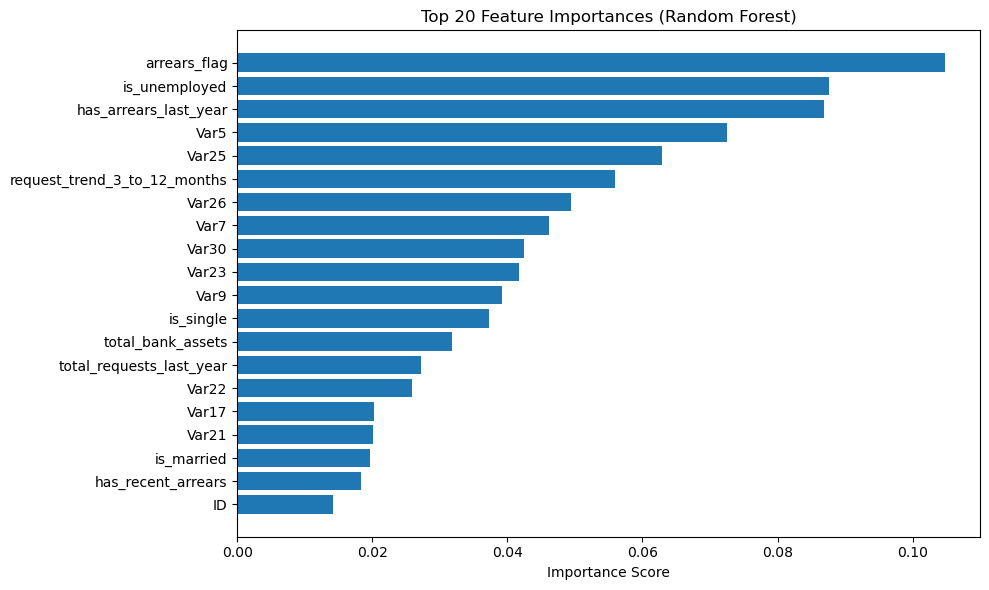

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get feature importances from Random Forest
importances = rf.feature_importances_
features = X.columns

# Create DataFrame and sort
rf_feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
rf_feat_df = rf_feat_df.sort_values(by='Importance', ascending=False).head(20)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(rf_feat_df['Feature'], rf_feat_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Top 20 Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

In [28]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# 1. Recalculate scale_pos_weight
neg, pos = y.value_counts()
scale_pos_weight = neg / pos

important_features = [
    'arrears_flag', 'is_unemployed', 'has_arrears_last_year', 'Var5', 'Var25',
    'request_trend_3_to_12_months', 'Var26', 'Var7', 'Var30', 'Var23',
    'Var9'
]
    


# 3. Subset features
X_train_rf = X_train[important_features]
X_val_rf = X_val[important_features]
X_test_rf = test_data_scaled[important_features]
y_test = test_data_scaled['target'].astype(int)

# 4. Train RF
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=2,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train_rf, y_train)

# 5. Evaluate RF
y_train_pred = rf.predict(X_train_rf)
y_test_pred = rf.predict(X_test_rf)
print(f"✅ RF Balanced Accuracy (Train): {balanced_accuracy_score(y_train, y_train_pred):.4f}")
print(f"✅ RF Balanced Accuracy (Test):  {balanced_accuracy_score(y_test, y_test_pred):.4f}")

# 6. Train XGBoost
xgb_model = XGBClassifier(
    n_estimators=50,
    max_depth=2,
    learning_rate=0.05,
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X[important_features], y)

# 7. Evaluate XGBoost
y_train_pred_xgb = xgb_model.predict(X[important_features])
y_test_pred_xgb = xgb_model.predict(X_test_rf)
print(f"✅ XGB Balanced Accuracy (Train): {balanced_accuracy_score(y, y_train_pred_xgb):.4f}")
print(f"✅ XGB Balanced Accuracy (Test):  {balanced_accuracy_score(y_test, y_test_pred_xgb):.4f}")

✅ RF Balanced Accuracy (Train): 0.6545
✅ RF Balanced Accuracy (Test):  0.5824
✅ XGB Balanced Accuracy (Train): 0.6555
✅ XGB Balanced Accuracy (Test):  0.6037


In [29]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)
lr.fit(X_train_rf, y_train)
print("✅ LR Balanced Accuracy (Test):", balanced_accuracy_score(y_test, lr.predict(X_test_rf)))

✅ LR Balanced Accuracy (Test): 0.63971159921336


In [30]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(
    max_iter=100,
    max_depth=3,
    class_weight='balanced',
    random_state=42
)
hgb.fit(X_train_rf, y_train)
print("✅ HGB Balanced Accuracy (Test):", balanced_accuracy_score(y_test, hgb.predict(X_test_rf)))

✅ HGB Balanced Accuracy (Test): 0.5444924190196134


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# ElasticNet Logistic Regression (requires saga solver)
elastic_net = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(
        penalty='elasticnet',
        solver='saga',
        l1_ratio=1,  # 0 = Ridge, 1 = Lasso, 0.5 = ElasticNet
        C=0.9,
        max_iter=100,
        class_weight='balanced',
        random_state=42
    ))
])

# Train
elastic_net.fit(X_train_rf, y_train)

# Evaluate
y_train_pred = elastic_net.predict(X_train_rf)
y_test_pred = elastic_net.predict(X_test_rf)
print(f"✅ ElasticNet Balanced Accuracy (Train): {balanced_accuracy_score(y_train, y_train_pred):.4f}")
print(f"✅ ElasticNet Balanced Accuracy (Test):  {balanced_accuracy_score(y_test, y_test_pred):.4f}")

✅ ElasticNet Balanced Accuracy (Train): 0.6704
✅ ElasticNet Balanced Accuracy (Test):  0.6398


In [32]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import balanced_accuracy_score

# 1. Build pipeline with scaling + ANN
ann_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(
        hidden_layer_sizes=(64, 32),  # two layers: 64 → 32
        activation='relu',
        solver='adam',
        alpha=0.001,                  # L2 regularization (similar to ridge)
        max_iter=300,
        random_state=42
    ))
])

# 2. Train
ann_pipeline.fit(X_train_rf, y_train)

# 3. Evaluate
y_train_pred = ann_pipeline.predict(X_train_rf)
y_test_pred = ann_pipeline.predict(X_test_rf)

print(f"✅ ANN Balanced Accuracy (Train): {balanced_accuracy_score(y_train, y_train_pred):.4f}")
print(f"✅ ANN Balanced Accuracy (Test):  {balanced_accuracy_score(y_test, y_test_pred):.4f}")

✅ ANN Balanced Accuracy (Train): 0.8987
✅ ANN Balanced Accuracy (Test):  0.5281


/Users/marcoayuob/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [33]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# 🔧 Define ANN model
ann_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(
        hidden_layer_sizes=(64,),
        max_iter=300,
        alpha=0.001,
        random_state=42
    ))
])

# 🔧 Voting Ensemble (soft voting = average probabilities)
voting = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('xgb', xgb_model),
        ('ann', ann_pipeline)
    ],
    voting='soft'
)
voting.fit(X_train_rf, y_train)

# Evaluate Voting
y_test_pred_voting = voting.predict(X_test_rf)
print(f"✅ VotingClassifier Balanced Accuracy (Test): {balanced_accuracy_score(y_test, y_test_pred_voting):.4f}")

# 🔧 Stacking Ensemble (meta-learner: Logistic Regression)
stacking = StackingClassifier(
    estimators=[
        ('rf', rf),
        ('xgb', xgb_model),
        ('ann', ann_pipeline)
    ],
    final_estimator=LogisticRegression(class_weight='balanced', random_state=42),
    passthrough=True,
    cv=5,
    n_jobs=-1
)
stacking.fit(X_train_rf, y_train)

# Evaluate Stacking
y_test_pred_stack = stacking.predict(X_test_rf)
print(f"✅ StackingClassifier Balanced Accuracy (Test): {balanced_accuracy_score(y_test, y_test_pred_stack):.4f}")

✅ VotingClassifier Balanced Accuracy (Test): 0.5743


/Users/marcoayuob/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marcoayuob/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marcoayuob/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marcoayuob/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marcoayuo

✅ StackingClassifier Balanced Accuracy (Test): 0.5834
